Dataset loaded successfully!
Dataset shape: (95662, 16)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-

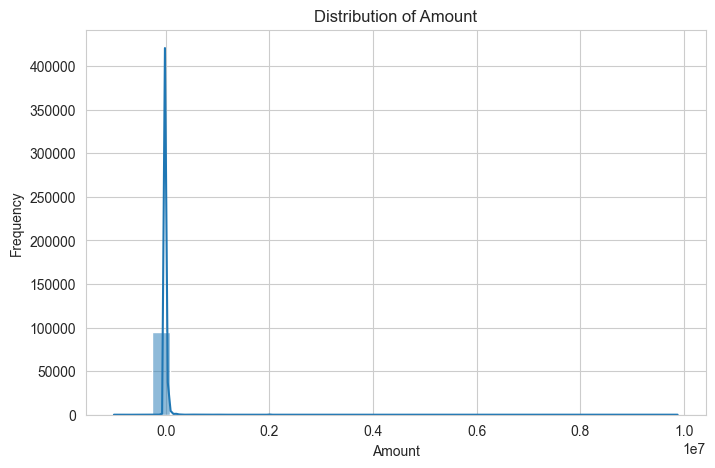

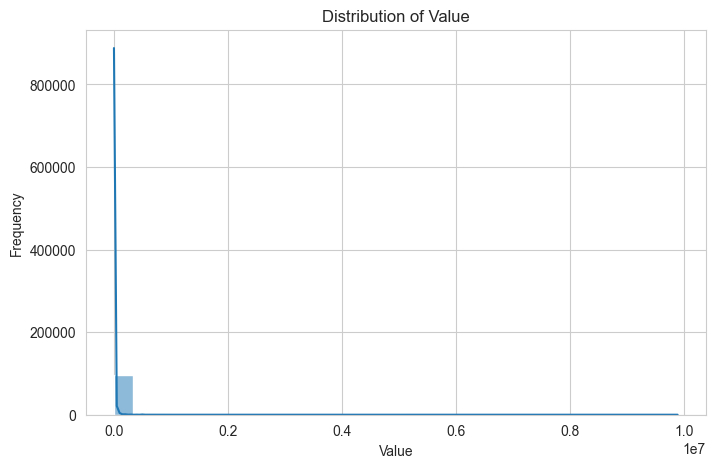

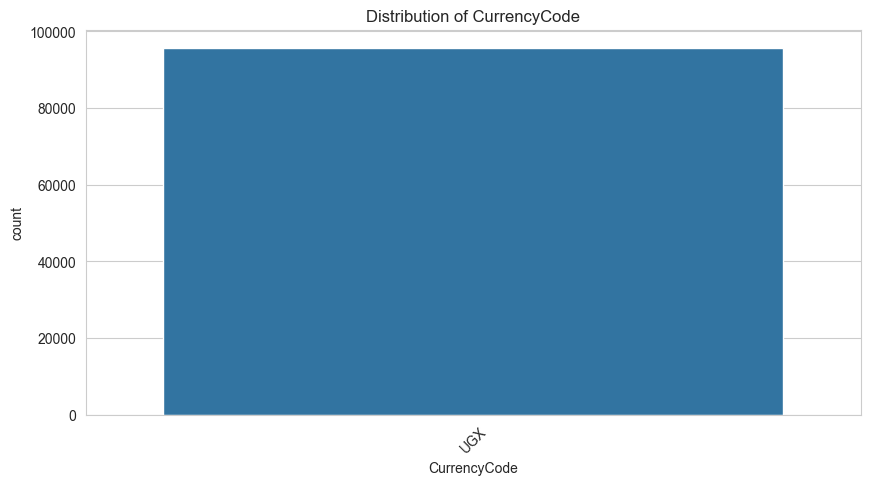

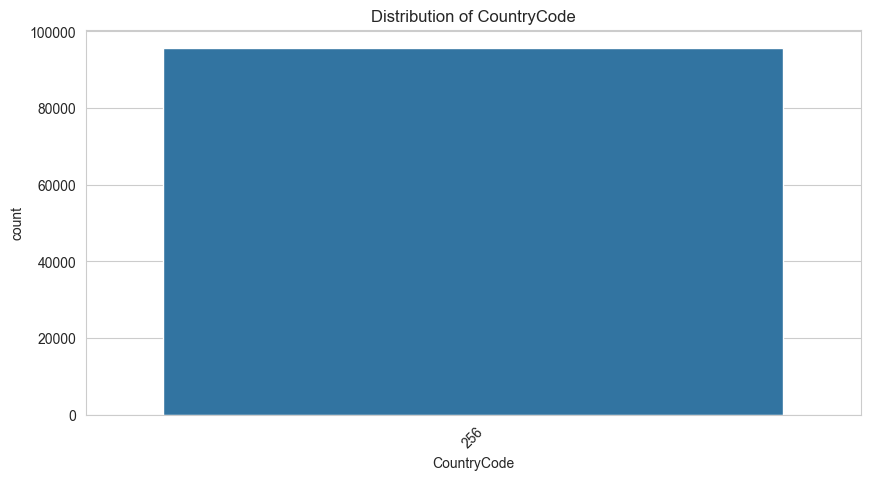

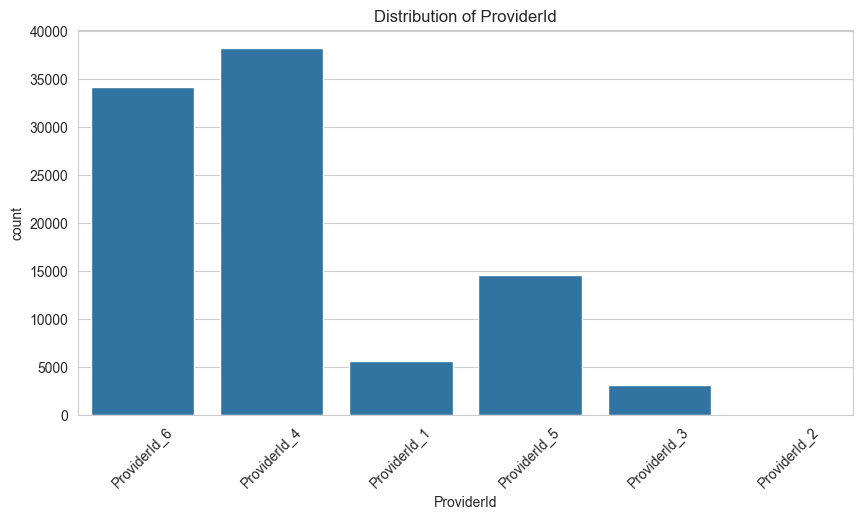

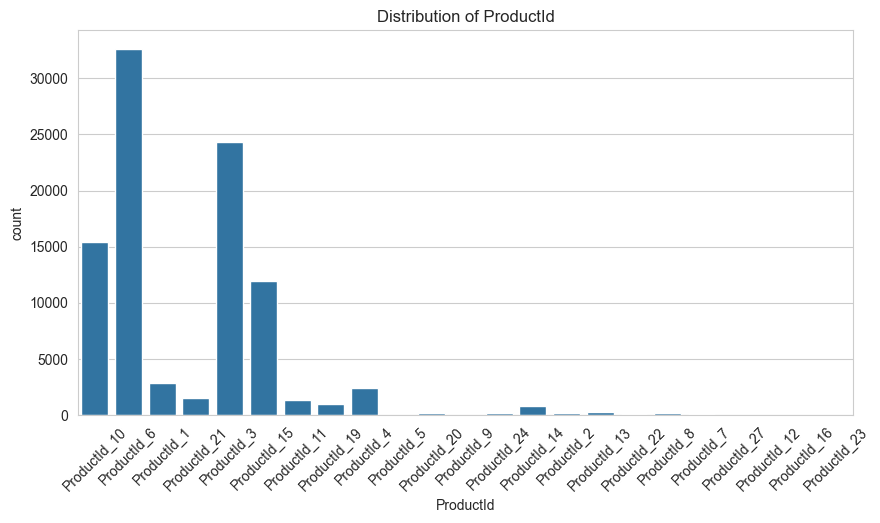

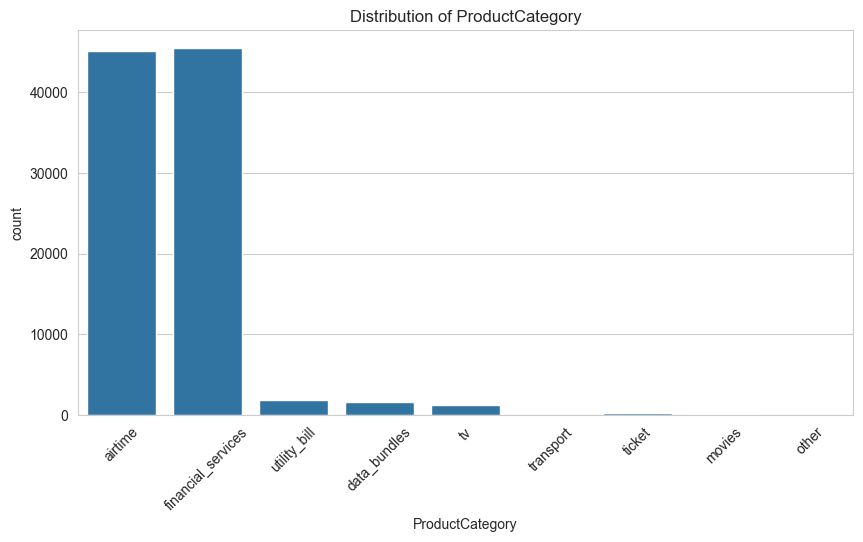

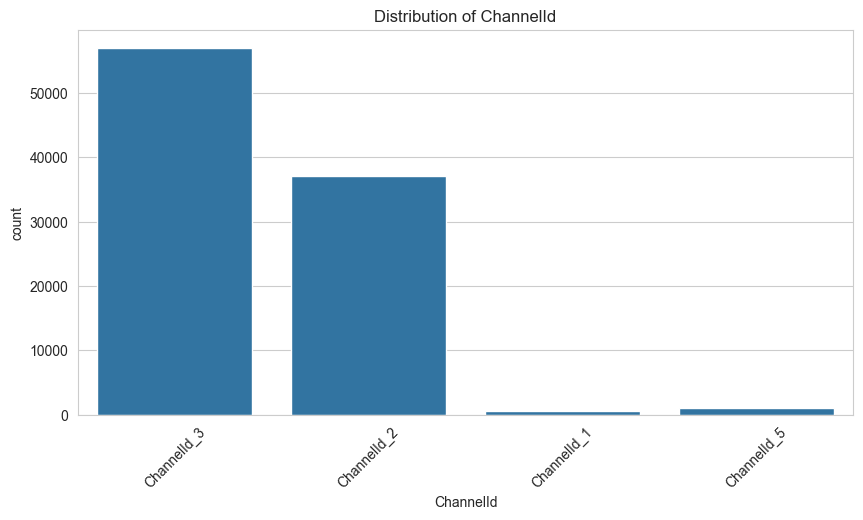

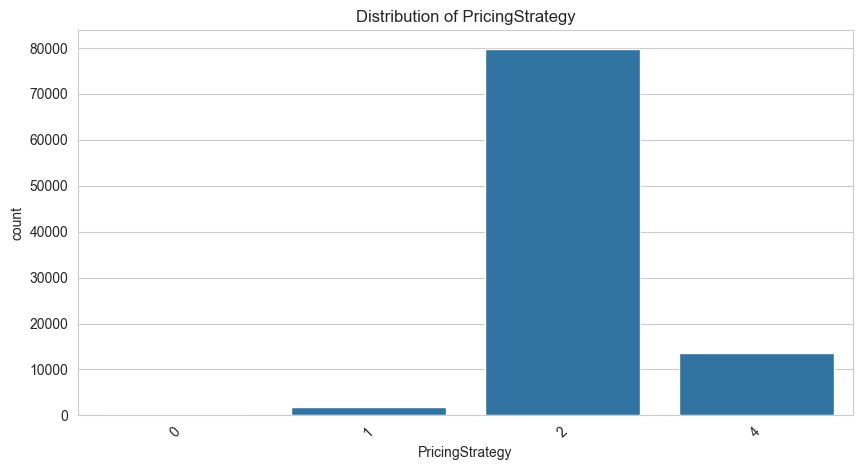

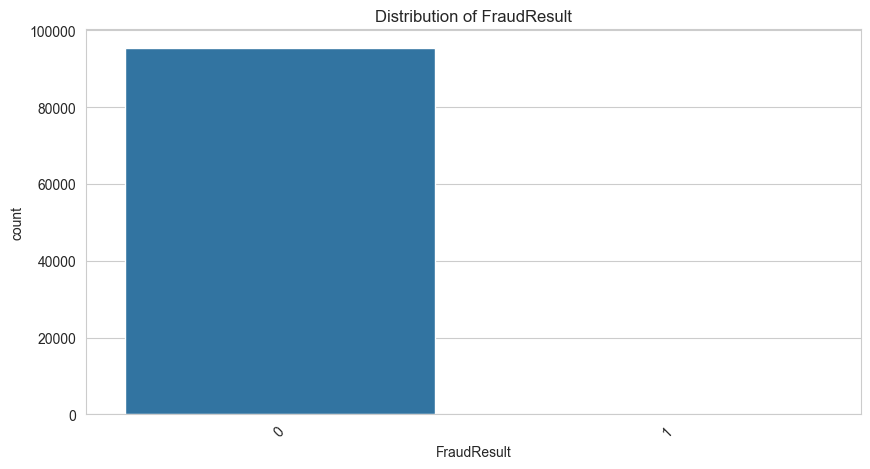

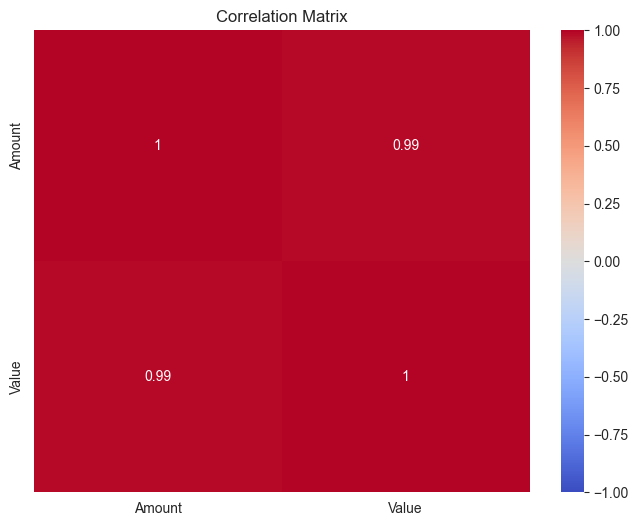

Missing Values:
 Series([], dtype: int64)

Missing Percentage:
 Series([], dtype: float64)


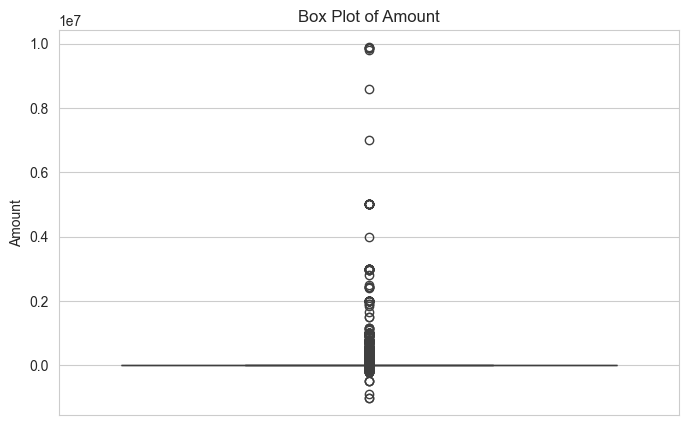

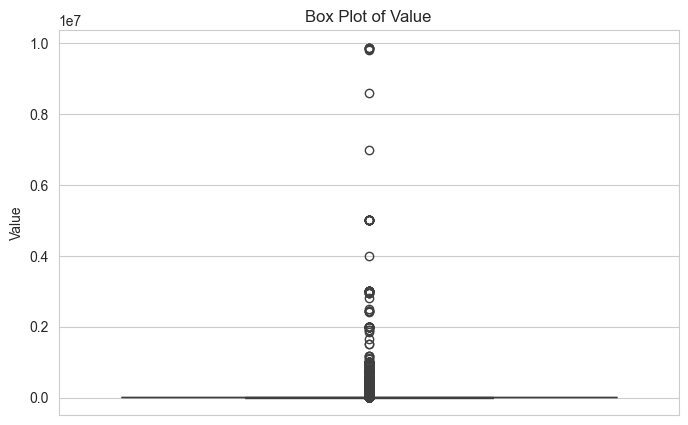

In [2]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization settings
%matplotlib inline
sns.set_style('whitegrid')

# 1. Load the dataset
try:
    df = pd.read_csv('../data/raw/data.csv')
    print('Dataset loaded successfully!')
except FileNotFoundError:
    print('Error: data.csv not found in data/raw/. Please ensure the file exists.')
    raise
except pd.errors.ParserError:
    print('Error: Unable to parse data.csv. Check file format or encoding.')
    raise

# 2. Show dataset structure (rows, columns, data types)
print(f'Dataset shape: {df.shape}')
print('\nData types and non-null counts:')
df.info()

# 3. Calculate summary statistics for numerical columns
numerical_cols = ['Amount', 'Value']
print('\nSummary statistics for numerical columns:')
print(df[numerical_cols].describe())

# 4. Plot distributions of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 5. Plot distributions of categorical features
categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 
                   'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 6. Calculate and plot correlations between numerical features
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 7. Check for missing values
missing_values = df.isnull().sum()
print('Missing Values:\n', missing_values[missing_values > 0])
missing_percent = (df.isnull().sum() / len(df)) * 100
print('\nMissing Percentage:\n', missing_percent[missing_percent > 0])

# 8. Detect outliers using box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()